# Linear Algebra for Electrical Engineers


## HW09: Linear Quadratic Control + Linear State Feedback Control

---

- In this homework, you will be aksed to implement a linear quadratic control and linear state feedback control.

- Since this is an integrated method that incorporates several concepts we learned throughout this course (Gram-Schmidt, QR factorization, and least squares),
we provide the codes for **Gram_Schmidt**, **QR factorization**, and **Least squares** from HW7.

- This HW consists of 5 problems.
    - Problem 1. implementing constrained least sqaures solver (0.2 point)
    - Problem 2. *Linear quadratic control as least squares problem* (0.2 point)
    - Problem 3. *State feedback control* (0.2 point)
    - Problem 4. *Solve Problem 17.6 of our textbook* (0.4 point)

- please fill out all the 

        # Problem #K. fill out here.

    of given skeleton code.

- you are not allowed to use 

        numpy.linalg, scipy
    
    for this homework.

In [4]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## Problem 1). Implementing constrained least squares solver (0.2 point)
---

First, we define the constrained least squares problem with the constraints given as a list of $p$ scalar equality constraints:

\begin{equation}
\begin{aligned}
    & \text{minimize} \| A \mathbf{x} - \mathbf{b}\|^2 \\
    & \text{subject to} \mathbf{c}^{\top}_i \mathbf{x} = \mathbf{d}_i,~~ i = 1, \cdots, p,  \\
\end{aligned}
\end{equation}
where $\mathbf{c}^{\top}_i$ are the rows of a matrix $C$. We form the *Lagrangian function*
\begin{equation}
\begin{aligned}
    & L(\mathbf{x}, \mathbf{z}) = \|A \mathbf{x} - \mathbf{b}\|^2 + \mathbf{z}_1 (\mathbf{c}^{\top}_1 \mathbf{x} - \mathbf{d}_1) + \cdots +
    \mathbf{z}_p (\mathbf{c}^{\top}_p \mathbf{x} - \mathbf{d}_p) 
\end{aligned}
\end{equation}
where $\mathbf{z}$ is the $p$-vector of *Lagrangian multipliers*. The method of Lagrangian multipliers tells us that if $\hat{\mathbf{x}}$ is a solution of the constrained least squares problem, then there is a set of Lagrangian multipliers $\hat{z}$ that satisfy
\begin{equation}
\begin{aligned}
    \frac{\partial L}{\partial \mathbf{x}_i}(\hat{\mathbf{x}}, \hat{\mathbf{z}}) = 0,~~~i = 1, \cdots, n,~~~~~ \frac{\partial L}{\partial \mathbf{z}_i}(\hat{\mathbf{x}}, \hat{\mathbf{z}}) = 0,~~ i = 1, \cdots, p. 
\end{aligned}
\end{equation}
These are the *optimality conditions* for the constrained least squares problem.

The second set of equations in the optimality conditions can be written as
\begin{equation}
\begin{aligned}
    \frac{\partial L}{\partial \mathbf{z}_i}(\hat{\mathbf{x}}, \hat{\mathbf{z}}) = \mathbf{c}^{\top}_i \mathbf{\hat{x}} - \mathbf{d}_i = 0,~~~i=1,\cdots,p,
\end{aligned}
\end{equation}
which states that $\mathbf{\hat{x}}$ satisfies the equality constraints $C\mathbf{\hat{x}}=\mathbf{d}$. The first set of equations, however, is more informative. Expanding the objective $\|A \mathbf{x} - \mathbf{b}\|^2$ as a sum of terms involving the entries of $\mathbf{x}$ and taking the partial derivative of $L$ with respect to $\mathbf{x}_i$ we obtain 
\begin{equation}
\begin{aligned}
    \frac{\partial L}{\partial \mathbf{x}_i}(\hat{\mathbf{x}}, \hat{\mathbf{z}}) = 2 \sum_{j=1}^n (A^{\top}A)_{ij}\hat{\mathbf{x}}_j - 2 (A^{\top}\mathbf{b})_i + \sum_{j=1}^p \hat{\mathbf{z}}_j (\mathbf{c}_j)_i = 0.
\end{aligned}
\end{equation}

These equations can be written in compact matrix-vector form as 

\begin{equation}
\begin{aligned}
   2(A^{\top}A)\hat{\mathbf{x}} - 2 A^{\top}\mathbf{b} + C^{\top} \hat{\mathbf{z}} = 0.
\end{aligned}
\end{equation}
Combining this set of linear equations with the feasibility conditions $C \hat{\mathbf{x}} = \mathbf{d}$, we can write the optimality conditions as one set of $n + p$ linear equations in the variables $(\hat{\mathbf{x}}, \hat{\mathbf{z}})$: 
\begin{equation}
\begin{aligned}
    \begin{bmatrix}
        2A^{\top}A & C^{\top} \\
        C & 0
    \end{bmatrix}
    \begin{bmatrix}
        \hat{\mathbf{x}} \\
        \hat{\mathbf{z}}
    \end{bmatrix} =
    \begin{bmatrix}
        2A^{\top}\mathbf{b} \\
        \mathbf{d}.
    \end{bmatrix}
\end{aligned}
\end{equation}

These equations are called the *KKT equations* for the constrained least squares problem. In addition, we should remind the *invertibility of KKT matrix*, where the $(n + p) \times (n + p)$ coefficient matrix in the equation above is **invertible** if and only if

\begin{equation}
\begin{aligned}
    C~\text{has linearly independent rows, and} \begin{bmatrix} A \\ C \end{bmatrix}~\text{has linearly independent columns.}
\end{aligned}
\end{equation}


With this KKT equations, we defined the constrained least squares solver in Sec. 16.3 of our textbook via QR factorization (**Algorithm 16.1** pp. 347).

---
   **Algorithm**  Constrained least squares via KKT equations.
given an $m \times n$ matrix $A$ and a $p \times n$ matrix $C$ that satisfy the invertibility of KKT matrix, an $m$-vector $\mathbf{b}$, and a $p$-vector $\mathbf{d}$.

1. *From Gram matrix*. Compte $A^{\top}A$.
2. *Solve KKT equations.* Solve KKT equations by QR factorization and back subtitution.


---
### In this problem, you will implement the constrained least squares solver according to the pseudocode above.

First, let's bring back some builing blocks for implementing the constrained least squares (CLS) solver from HW7.
We privode `gram_schmidt()`, `QR_factorization()`, `back_substitution()`, and `solve_linear_equation()` functions from HW7.

In [177]:
# These are the functions for solving least squares methods from HW7.

def gram_schmidt(a):
    """
    in: a - length k list of n-dim np.arrays.
    out: q - length k list of n-dim orthonormal np.arrays. 
    """
    q = []
    # orthogonalization
    for i in range(len(a)): # for i = 1, ..., k
        q_tilde = a[i]
        for j in range(len(q)): # for each dimension of q_tilde
            # recursively add dot(q)
            q_tilde = q_tilde - (np.dot(q[j], a[i]))*q[j]
        # Test for linear dependence
        if np.sqrt(sum(q_tilde**2)) <= 1e-10:
            print('Vectors are linearly dependent.')
            print('GS algorithm terminates at iteration ', i + 1)
            return q
        #Normalization
        else:
            q_tilde = q_tilde / np.sqrt(sum(q_tilde**2))
            q.append(q_tilde)
    return q


def QR_factorization(A):
    """
    in: numpy array whose k columns are linearly independent.
    """
    # we feed gram_schmidt() A.T since it orthonormalizes row vectors of the input array. Thus, we get transposed array whose rows are      orthonormal. 
    Q_transpose = np.array(gram_schmidt(A.T))
    R = Q_transpose @ A # since Q^T = Q^-1
    Q = Q_transpose.T
    return Q, R


def back_substitution(R, b):
    n = R.shape[0]
    x = np.zeros(n)
    # iterate in a reversed order: n, ..., 1.
    for i in reversed(range(n)):
        x[i] = b[i]
        # recursively subtract R_{i,i+1} x_{i+1}
        for j in range(i + 1, n):
            x[i] = x[i] - R[i, j] * x[j]
        # finally divide by R_{i,i}
        x[i] = x[i] / R[i, i]
    return x

def solve_linear_equation(A, b):
    """
    in: A - numpy array that represents invertible square matrix.
        b - numpy array representing n vector.
    """
    # 1) QR factorize A.
    Q, R = QR_factorization(A)
    # compute Q^T b
    b_tilde = Q.T @ b
    # solve the triangular equation Rx = Q^T b using backsubstitution.
    x = back_substitution(R,b_tilde)
    return x

### Now let's build our cls solver according to the Algorithm 16.1 of our textbook.

In [2]:
def cls_solve_kkt(A, b, C, d):
    m, n = A.shape
    p, n = C.shape 
    #Gram matrix 
    G = A.T @ A 
    #KKT matrix 
    KKT = np.vstack([
        # Problem #1. Fill in here.
        # Problem #1. Fill in here.
        ])
    # get concatenated vector of x and z.
    xzhat = solve_linear_equation(
        KKT, 
        # Problem #1. Fill in here.    
        ) 
    # we only need n-vector x.
    return # Problem #1. Fill in here.



In [1]:
# Check if our implementation is right.
m = 10 
n = 5 
p = 2 
A = np.random.normal(size = (m,n)) 
b = np.random.normal(size = m) 
C = np.random.normal(size = (p,n))
d = np.random.normal(size = p)

x = cls_solve_kkt(A, b, C, d)

print("Solution:", x)
print("Check if the eqaulity conditions have been met.")
print(np.allclose(C @ x, d))


NameError: name 'np' is not defined

## Problem 2). Linear quadratic control as least squares problem. (0.2 points)
---


## Linear dynamical system with state feedback

For a time-invariant linear dynamical system with $n$-vector state $\mathbf{x}$_t and $m$-vector control input $\mathbf{u}$_t, the dynamics is

\begin{equation}
    \mathbf{x}_{t+1} = A \mathbf{x}_t + B \mathbf{u}_t,~~ t=1,2,\cdots
\end{equation}

In *state feedback control* the state $\mathbf{x}_t$ is measured, and the input $\mathbf{u}$_t is a linear function of the state, expressed as

\begin{equation}
    \mathbf{u}_t = K \mathbf{x}_t
\end{equation}

where $K$ is the $m \times n$ *state-feedback gain matrix*.
The term $feedback$ refers to the idea that the state is measured, and then (after multiplied by $K$) fed back into the system, via the input. This leads to a loop, where the state affects the input, and the input affects the (next) state.


The matrix $K$ is called the *state feedback gain matrix*, and for this HW, **we show how an appropriate state feedback gain matrix $K$ can be found using linear quadratic control.**

The system has an output, the $p$-vector $\mathbf{y}_t$, given by

\begin{equation}
\mathbf{y}_t = C_t \mathbf{x}_t, ~~~ t=1,2,\cdots
\end{equation}

Usually, $m \leq n$ and $p \leq n$, *i.e.*, there are fewer inputs and outputs than states.
The state \mathbf{x}_t, input \mathbf{u}_t, and output \mathbf{y}_t typically represents *deviations* from some standard or desired operating conditions. For this reason it is desirable to have $\mathbf{x}_t, \mathbf{y}_t$ and $\mathbf{u}_t$ small.

*Linear quadratic control* refers to the problem of choosing the input and state sequences, over a time period $t=1,\cdots,T$, so as to minimize a sum of squares and additional linear equality constraints. 
The 'linear' refers to the linear dynamics, and 'quadratic' refers to the objective function, which is sum of squares.

The objective function has the form $J = J_{output} + \rho J_{input}$, where

\begin{equation}
    J_{output} = \| \mathbf{y}_1 \|^2 + \cdots + \| \mathbf{y}_T \|^2 = \| C_1 \mathbf{x}_1 \|^2 + \cdots + \| C_T \mathbf{x}_T  \|^2 \\
   J_{input} = \| \mathbf{u}_1 \|^2 + \cdots + \| \mathbf{u}_{T-1} \|^2
\end{equation}.

The positive parameter $\rho$ weights the input objective $J_{input}$ relative to the output objective $J_{output}$.
With the initial and final state contraints $x_1 = x^{\mathrm{init}}$ and $x_T = x^{\mathrm{des}}$, the linear quadratic control problem is

\begin{equation}
\text{minimize}~~J_{output} + \rho J_{input} \\
\text{subject to}~~\mathbf{x}_{t+1} = A_t \mathbf{x}_t + B_t \mathbf{u}_t, t=1,\cdots,T-1, \\
        \mathbf{x}_1 = x^{\mathrm{init}},~~\mathbf{x}_T = x^{\mathrm{des}}
\end{equation}

### Formulation as constrained least squares problem.

We can solve the linear quadratic control problem (the equation above) by setting it up as as big linearly constrained least squares problem. We define the vector $\mathbf{z}$ of all these variables, stacked:

\begin{equation}
    \mathbf{z} = (\mathbf{x}_1, \cdots, \mathbf{x}_T, \mathbf{u}_1, \cdots, \mathbf{u}_{T-1}).
\end{equation}

The dimension of $\mathbf{z}$ is $Tn + (T-1)m$. The control objective can be expressed as 
$\| \tilde{A}\mathbf{z}-\tilde{ \mathbf{b}} \|^2$, where $\tilde{ \mathbf{b}}=\mathbf{0}$ and A is the block matrix

\begin{equation}
    \tilde{A} =
\left[\begin{array}{@{}c|c@{}}
  \begin{matrix}
  C_1 & & &   \\
   & C_2 & &  \\
   & &  \ddots & \\
   & & & C_T
  \end{matrix}
  & 0 \\
\hline
  0 &
  \begin{matrix}
  \sqrt{\rho}I &  &\\
  &\ddots&  \\
   & & \sqrt{\rho}I
  \end{matrix}
\end{array}\right].
\end{equation}

IN this matrix (block) entries not shown are zero, and the identity matrices in the lower right corner have dimension $m$. (The lines in the matrix delineates the portions related to the statets and the inputs.) The dynamics constraints, and the initial and final constraints, can be expressed as $\tilde{C}\mathbf{z}=\tilde{\mathbf{d}}$, with


\begin{equation}
    \tilde{C} =
\left[\begin{array}{@{}c|c@{}}
  \begin{matrix}
  A_1 & -I & & &           \\  
   & A_2 & -I & &          \\
   & &  \ddots & \ddots &  \\
   & & & A_{T-1} & -I
  \end{matrix}
  & 
  \begin{matrix}
   B_1 & & & &       \\  
   & B_2 & & &       \\
   & & \ddots & &    \\
   & & & & B_{T-1}
  \end{matrix} \\
\hline
  \begin{matrix}
  I &  &  &  &\\
    &  &  &  & I
  \end{matrix}
  &
  \end{array}
  \right],~~~

\tilde{\mathbf{d}} =
\begin{bmatrix}
0 \\ 0 \\ \vdots \\ 0 \\ \hline \\ x^{\mathrm{init}} \\ x^{\mathrm{des}}
\end{bmatrix},
\end{equation}

where (block) entries not shown are zero. (The vertical line separates the portions of the matrix associated with the states and the inputs, and the horizontal lines separate the dynamics equations and the initial and final state constraints.)

The solution $\hat{\mathbf{z}}$ of the constrained least squares problem

\begin{equation}
    \text{minimize}~~ \| \tilde{A}\mathbf{z} - \tilde{\mathbf{b}} \|^2 \\
    \text{subject to}~~ \tilde{C}\mathbf{z} = \tilde{\mathbf{d}}
\end{equation}


gives us the optimal input trajectory and the associated optimal state (and output) trajectory.
The solution $\hat{\mathbf{z}}$ is a linear function of $\hat{\mathbf{b}}$ and $\hat{\mathbf{d}}$; since here $\hat{\mathbf{b}}$, it is a linear function of $\mathbf{x}^{\mathrm{init}}$ and  $\mathbf{x}^{\mathrm{des}}$.

---
### Kronecker product.

To create the big matrices $\tilde{A}$ and $\tilde{C}$, we need to define block diagonal matrices with the same matrix repeated a number of times along the diagonal. There are many ways to do this in Python. One of the simplest ways uses the 'np.kron' function, for the 
Kronecker product of two matrices.

### First, we will implement a function that creates a Kronecker products.

In [5]:
# reference: numpy's function
Rand = np.random.normal(size=(1, 3))

Kron_numpy = np.kron(np.eye(3), Rand)

def create_kron(expand_dim, A):
    G = # Problem #2, fill in here.
    p, q = A.shape # (2,2)
    m, n = G.shape # (3,3)
    matrix = np.zeros((m * p, n * q))
    for k in range(n):
        matrix[p * k:p * (k + 1), q * k:q * (k + 1)] = # Problem #2, fill in here.
    return matrix

print("Compare the Kronecker matrix of ours to Numpy's")
print("----- Kron matrix of Numpy -----")
print(Kron_numpy)
Kron_ours = create_kron(3, Rand)
print("----- Kron matrix of ours -----")
print(Kron_ours)

print("Are Kron matrix of numpy and ours the same?")
print(np.allclose(Kron_numpy, Kron_ours))



SyntaxError: invalid syntax (<ipython-input-5-9c743ad74ec7>, line 9)

**Linear quadratic control example.** We start by writing a function `lqr` that constructs and solves the constrained least squares problem for linear quadratic control. The function returns three arrays
```python
x = [ x[1], x[2], ..., x[T] ],
u = [ u[1], u[2], ..., u[T-1] ],
y = [ y[1], y[2], ..., y[T] ]. 
```
The first two contain the optimal solution of the problem. The third array contains
$y_t = Cx_t$. 

We allow the input arguments `x_init` and `x_des` to be matrices, so we can solve the same problem for different pairs of initial and end states, with one function call. If the number of columns in `x_init` and `x_des` is `q`, then the entries of the three output sequences `x, u, y` are matrices with `q` columns. The `i`th columns are the solution for the initial and end states specified in the `i`th columns of `x_init` and `x_des`.

To begin, we need to define the constrained least squares solver. Thus, let's bring back the least squares solver we implemented in HW7.
Remember that we need `QR_factorization()` and `back_subtitution()` to solve least squares, and `QR_factorization()` requires `gram_schimidt()`.
We provide this methods (what are the answer for HW7) here.

In [6]:
# let's apply the example in our textbook. (Chapter 17.2.1, pp.368)
A = np.array([[ 0.855, 1.161, 0.667], [0.015, 1.073, 0.053], [-0.084, 0.059, 1.022]])
B = np.array([[-0.076], [-0.139] ,[0.342]])
C = np.array([[ 0.218, -3.597, -1.683]])
n = 3
p = 1 
m = 1
x_init = np.array([[0.496], [-0.745], [1.394]])
x_des = np.zeros((n, 1))

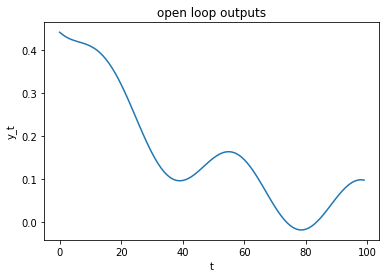

In [7]:
# plot the open loop response Fig. 17.4 of the textbook.
T = 100
yol = np.zeros((T, 1))
Xol = np.hstack([x_init, np.zeros((n,T - 1))])
for k in range(T - 1):
    Xol[:, k + 1] = A @ Xol[:, k]
yol = C @ Xol
plt.ion()
plt.xlabel('t')
plt.ylabel('y_t') 
plt.plot(np.arange(T), yol.T)
plt.title('open loop outputs') 
plt.show()

### Now, let's define our linear quadratic controller.

In [6]:
# Let's implement our Linear Quadratic Controller.
def lqr(A, B, C, x_init, x_des, T, rho):
    n = A.shape[0]
    m = B.shape[1]
    p = C.shape[0]
    q = x_init.shape[1]
    # create \tilde{A}, with the form of 
    #               |  C_1                                              |   
    #               |      C_1                                          |
    #               |         .                     0                   |
    #               |           .                                       |
    #               |             .                                     |
    #  \tilde{A} =  |               C_T                                 |       
    #               |                   \sqrt{\rho}I                    |
    #               |                           \sqrt{\rho}I            |
    #               |       0                                           |
    #               |                                   \sqrt{\rho}I    |
    Atil = np.vstack([
                np.hstack([
                    # Problem #2, fill in here.
                    np.zeros( (p * T, m * (T-1)))
                          ]),
                np.hstack([
                    np.zeros((m * (T - 1), n * T)),
                    # Problem #2, fill in here.
                          ])
                     ])

    btil = np.zeros((p * T + m * (T - 1), q))
    # construct Ctilde bit by bit.
    # create upper left block
    Ctil11 = np.hstack([   create_kron(T - 1, A)   , np.zeros((n*(T-1), n))   ]) - np.hstack([   np.zeros((n*(T-1), n))   ,   np.eye(n*(T-1))       ])

    # create upper right block
    Ctil12 = create_kron(T-1, B) # Problem #2, fill in here.

    # create lower left block
    Ctil21 = np.vstack([    np.hstack([np.eye(n), np.zeros((n,n*(T-1)))  ]), # Problem #2, fill in here. ])])

    # create lower right block
    Ctil22 = np.zeros((2*n, m*(T-1)))

    Ctil = # Problem #2, fill in here.

    dtil = np.vstack([np.zeros((n*(T-1), q)), x_init, x_des])

    z = # Problem #2, fill in here.

    x = [z[i * n:(i + 1) * n] for i in range(T)]
    u = [z[n * T + i * m: n * T + (i + 1) * m] for i in range(T-1)]
    y = [(C @ xt) for xt in x]
    return x, u, y

SyntaxError: invalid syntax (<ipython-input-6-458f5c8cfe99>, line 41)

### Linear quadratic control

In [7]:
"We apply the fucntion the example in 17.2.21."
# let's test for rho = 0.2.
# The results are sadly differ from the 2nd row of Fig. 17.6
rho = 0.2
x, u, y = lqr(A, B, C, x_init, x_des, T, rho)

J_input = np.linalg.norm(u)**2
J_output = np.linalg.norm(y)**2

print(J_input)
print(J_output)

NameError: name 'lqr' is not defined

In [8]:
plt.plot(np.arange(T - 1), u)
plt.xlabel('t')
plt.ylabel('u_t') 
plt.title('lqr_inputs rho = 0.2') 
plt.show()
plt.plot(np.arange(T), y) 
plt.xlabel('t') 
plt.ylabel('y_t')
plt.title('lqr_outputs rho = 0.2') 
plt.show()

NameError: name 'plt' is not defined

## Problem 3). State feedback controller (0.2 points)

In [9]:
# initialize each column of x_init as ith unit vectors....

# x_init for state feedback controller is x_init = [e1, e2, ..., en] -> I_n matrix
x_init_sf = np.eye(n)

# split the I_n as a list of its columns

# x_des is zero matrix
x_init_sf_list = [x_init_sf[:, i][:, None] for i in range(n)]

x_des = np.zeros((n, n))
x_des_list = [x_des[:, i][:, None] for i in range(n)]

# Linear state feedback control
# should test on various initial conditions.
# prepare the list to append the state feedback inputs.
usf = []
for i in range(n):
    # for each x_init from 'x_init_sf_list',
    # run LQR for T steps to get the state feedback inputs
    _, _usf, _ = # Problem #3, fill in here.
    usf.append(np.array(_usf)[..., None])

# concatenate the m-vector optimal inputs to its n columns.
usf = np.concatenate(usf, axis=-1) # [T, m, n]

# as noted in chapter 17.2.3 of our textbook, u_1 = K @ x_1
# Hint: x_1 is an identity matrix in our case
K = # Problem #3, fill in here.

# run state feedback for 150 timesteps.
TT = 150
Xsf = np.hstack([x_init, np.zeros((n, TT - 1))]) # (n, TT)

for k in range(TT - 1):
    # Hint: x_{t+1} = Ax_t + Bu_t
    # u_t = K x_t
    Xsf[:, k + 1] = # Problem #3, fill in here.
usf = np.matmul(K, Xsf[:, 0:TT - 1])
ysf = np.matmul(C, Xsf) # (1, 150)


SyntaxError: invalid syntax (<ipython-input-9-0f27a3e1b1bb>, line 15)

In [10]:
#Plot the two outputs, compare with Fig. 17.7 of our textbook (pp. 372)
plt.plot(np.vstack([np.vstack(y), np.zeros((TT - T, 1))]))
plt.plot(ysf.T)
plt.legend(["Optimal", "State Feedback"])

NameError: name 'plt' is not defined

## Linear dynamical system with state feedback

For a time-invariant linear dynamical system with $n$-vector state $\mathbf{x}$_t and $m$-vector control input $\mathbf{u}$_t, the dynamics is

\begin{equation}
    \mathbf{x}_{t+1} = A \mathbf{x}_t + B \mathbf{u}_t,~~ t=1,2,\cdots
\end{equation}

In *state feedback control* the state $\mathbf{x}_t$ is measured, and the input $\mathbf{u}$_t is a linear function of the state, expressed as

\begin{equation}
    \mathbf{u}_t = K \mathbf{x}_t
\end{equation}

where $K$ is the $m \times n$ *state-feedback gain matrix*.
The term $feedback$ refers to the idea that the state is measured, and then (after multiplied by $K$) fed back into the system, via the input. This leads to a loop, where the state affects the input, and the input affects the (next) state.


## Problem 4). Solve Problem 17.6 of our textbook (pp. 379) (0.4 points)
---
### For problem 17.6(a), we assume an open loop control, where $\mathbf{u}_t = 0$. Thus, we have a relationship of

\begin{equation}
    \mathbf{x}_{t+1} = A \mathbf{x}_t,~~ t=1,2,\cdots
\end{equation}


The system has an output, the $p$-vector $\mathbf{y}_t$, given by

\begin{equation}
\mathbf{y}_t = C \mathbf{x}_t, ~~~ t=1,2,\cdots
\end{equation}

Thus, for an open-loop case, the output should be like
\begin{equation}
\mathbf{y}_t = C A^{t-1} \mathbf{x}^{\mathrm{init}}, ~~~ t=1,\cdots, T,
\end{equation}
which is called the open-loop output.

Shape of open loop states of X: (4, 120)


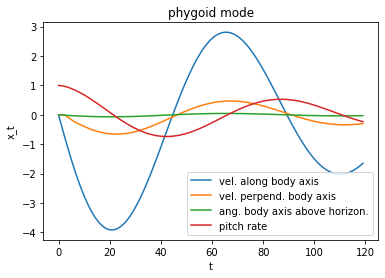

In [245]:
# flight control example
A = np.array( # (4 * 4)
    [[0.99, 0.03, -0.02, -0.32],
     [0.01, 0.47, 4.70, 0.00],
     [0.02, -0.06, 0.40, 0.00],
     [0.01, -0.04, 0.72, 0.99]]
)

n = 4 
# Input matrix
B = np.array(
    [[0.01, 0.99], 
     [-3.44, 1.66], 
     [-0.83, 0.44],
     [-0.47, 0.25]]
) # (4 * 2)


x_init = np.array([0, 0, 0, 1])[:, None]
# all inputs are zero. 

# 17.6 (a)
T = 120
yol = np.zeros((T, 1))
Xol = np.hstack([x_init, np.zeros((n, T - 1))])
print("Shape of open loop states of X:", Xol.shape)
# plot the open loop response Fig. 17.4 of the textbook.

for k in range(T-1):
    Xol[:, k + 1] = # Problem #4, fill in here.
# yol = C @ Xol
plt.ion()
plt.title('phygoid mode')
plt.plot(np.arange(T), Xol.T[:,0], label='vel. along body axis')
plt.plot(np.arange(T), Xol.T[:,1], label='vel. perpend. body axis')
plt.plot(np.arange(T), Xol.T[:,2], label='ang. body axis above horizon.')
plt.plot(np.arange(T), Xol.T[:,3], label='pitch rate')
plt.xlabel('t') 
plt.ylabel('x_t')
plt.legend(loc='best')
plt.show()




### Problem 17.6(b): Linear quadratic control.

condition:
- $C = I$
- $\rho = 100$
- $T = 100$
- $\mathbf{x}_1 = \mathbf{e}_4 = [0, 0, 0, 1]^{\top}$
- $\mathbf{x}^{\mathrm{des}} = 0$

### Plot the state and input variables over $t = 1, \cdots, 120.$ (For $t = 100, \cdots, 120$, the state and input variables are zero.)

(120, 4)


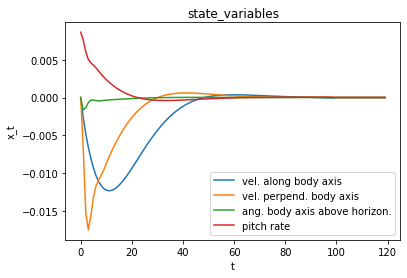

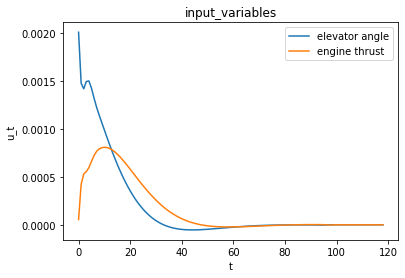

In [246]:

C = np.eye(4) # an identity matrix of shape (4, 4)
x_init = np.array([0, 0, 0, 1])[:, None]
x_des = np.zeros((n,1))
rho = 100
T = 100
x, u, y = lqr(A, B, C, x_init, x_des, T, rho)

x.extend(np.zeros((20, 4)))
x = np.array(x) #  for the ease of slicing
u.extend(np.zeros((20, 2)))
u = np.array(u) #  for the ease of slicing


plt.ion()
plt.title('state_variables')
plt.plot(np.arange(T + 20), x[:, 0], label='vel. along body axis') 
plt.plot(np.arange(T + 20), x[:, 1], label='vel. perpend. body axis') 
plt.plot(np.arange(T + 20), x[:, 2], label='ang. body axis above horizon.') 
plt.plot(np.arange(T + 20), x[:, 3], label='pitch rate') 
plt.xlabel('t') 
plt.ylabel('x_t')
plt.legend(loc='lower right')
plt.show()

plt.ion()
plt.title('input_variables')
plt.plot(np.arange(T -1 + 20), u[:, 0], label='elevator angle')
plt.plot(np.arange(T -1 + 20), u[:, 1], label='engine thrust')
plt.xlabel('t')
plt.ylabel('u_t') 
plt.legend(loc='upper right')
plt.show()



### Problem 17.6(c): Find state feedback gain matrix $K$, and verify that it is almost the same as the one obtained with $T=50$.

condition:
- $C = I$
- $\rho = 100$
- $T = 100$
- $\mathbf{x}_1 = \mathbf{e}_4 = [0, 0, 0, 1]^{\top}$
- $\mathbf{x}^{\mathrm{des}} = 0$

### Plot the state and input variables over $t = 1, \cdots, 120.$ (For $t = 100, \cdots, 120$, the state and input variables are zero.)

In [11]:

# initialize each column of x_init as ith unit vectors....
# flight control example
A = np.array( # (n * n)
    [[0.99, 0.03, -0.02, -0.32],
     [0.01, 0.47, 4.70, 0.00],
     [0.02, -0.06, 0.40, 0.00],
     [0.01, -0.04, 0.72, 0.99]]
)
# Input matrix
B = np.array(
    [[0.01, 0.99], 
     [-3.44, 1.66], 
     [-0.83, 0.44],
     [-0.47, 0.25]]
) # (n, m)

C = np.eye(4) # (p, n)


n = 4
x_init = np.array([0, 0, 0, 1])[:, None]

x_init_sf = np.eye(n)
x_init_sf_list = [x_init_sf[:, i][:, None] for i in range(n)]

x_des = np.zeros((n, n))
x_des_list = [x_des[:, i][:, None] for i in range(n)]

# Linear state feedback control
# should test on various initial conditions.
usf = []
for i in range(n):
    _, _usf, _ = # Problem #4, fill in here.
    usf.append(np.array(_usf)[..., None]) # (2, 1)

usf = np.concatenate(usf, axis=-1)
K = usf[0] # (m, n)
# simulate over horizon 150

T = 50
usf2 = []
for i in range(n):
    _, _usf2, _ = # Problem #4, fill in here.
    usf2.append(np.array(_usf2)[..., None]) # (2, 1)

usf2 = np.concatenate(usf2, axis=-1)
K2 = usf2[0] # (m, n)
# simulate over horizon 150
# You might need to run several times to get true
print("----- Is K close to K2? -----")
print(np.allclose(K, K2))




SyntaxError: invalid syntax (<ipython-input-11-fa27f1c73727>, line 33)

### Problem 17.6(d): Find state feedback gain matrix $K$, and verify that it is almost the same as the one obtained with $T=50$.

condition:
- $C = I$
- $\rho = 100$
- $T = 100$
- $\mathbf{x}_1 = \mathbf{e}_4 = [0, 0, 0, 1]^{\top}$
- $\mathbf{x}^{\mathrm{des}} = 0$

### Plot the state and input variables over $t = 1, \cdots, 120.$ (For $t = 100, \cdots, 120$, the state and input variables are zero.)

In [12]:

TT = 120
Xsf = np.hstack([x_init, np.zeros((n, TT - 1))])

for k in range(TT - 1):
    Xsf[:, k + 1] = # Problem #4, fill in here.
usf = np.matmul(K, Xsf[:, 0:TT - 1])
ysf = np.matmul(C, Xsf)

#Plot the two outputs
plt.ion()
plt.title('state_variables')
plt.plot(np.arange(TT), Xsf.T[:, 0], label='vel. along body axis') 
plt.plot(np.arange(TT), Xsf.T[:, 1], label='vel. perpend. body axis') 
plt.plot(np.arange(TT), Xsf.T[:, 2], label='ang. body axis above horizon.') 
plt.plot(np.arange(TT), Xsf.T[:, 3], label='pitch rate') 
plt.xlabel('t') 
plt.ylabel('x_t')
plt.legend(loc='lower right')
plt.show()

plt.ion()
plt.title('input_variables')
plt.plot(np.arange(TT - 1), usf.T[:, 0], label='elevator angle')
plt.plot(np.arange(TT - 1), usf.T[:, 1], label='engine thrust')
plt.xlabel('t')
plt.ylabel('u_t') 
plt.legend(loc='upper right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-c02fa8d8f0e9>, line 5)